<a href="https://colab.research.google.com/github/mitsu666/tree_to_ppt/blob/main/tree_to_ppt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-pptx

     |████████████████████████████████| 8.9MB 5.6MB/s 
     |████████████████████████████████| 153kB 47.4MB/s 
  Created wheel for python-pptx: filename=python_pptx-0.6.18-cp36-none-any.whl size=275707 sha256=cf48ccd634f7fe732dcfef106d8f6ef9b4fdcd4d86ee1eec5d94710599d55e34
  Stored in directory: /root/.cache/pip/wheels/1f/1f/2c/29acca422b420a0b5210bd2cd7e9669804520d602d2462f20b
Successfully built python-pptx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches, Pt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
#irisデータで例を出す
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## 以降はclfというモデルオブジェクトがあることが前提

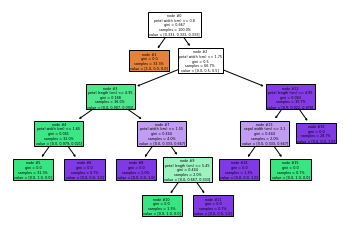

In [ ]:
#ノードのテキスト抽出
text1 = plot_tree(clf, feature_names=iris.feature_names, filled=True,proportion=False,node_ids=True)
text2 = plot_tree(clf, feature_names=iris.feature_names, filled=True,proportion=True,node_ids=True)

tex_set = [text1[i].get_text().split("\n")+[text2[i].get_text().split("\n")[-1]] for i in range(len(text1))]
tex_set  = [[i for i in tex if (i.find('entropy')==-1) and (i.find('node')==-1)] for tex in tex_set]

In [ ]:
#階層数を抽出する関数定義
def parents(i):
    for l in [[i,clf.tree_.children_right[i]] for i in range(len(text1))]+ [[i,clf.tree_.children_left[i]] for i in range(len(text1))]:
        if l[1] == i:
            #print (l)
            value = l[0]
            break
        else:
            value = 99
    return (value)
def num_layer(node):
    for i in range(10):#最大の深さを入れるここでは10とする
        if parents(node) == 99:
            break
        node = parents(node)
    return i
layers = [num_layer(i) for i in range(len(text1))]

In [ ]:
from pptx.dml.color import RGBColor
prs = Presentation()
blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

# left = Inches(1)
# top = Inches(1)
# width = Inches(2)
# height = Inches(1)
# txBox = slide.shapes.add_shape(MSO_SHAPE.RECTANGLE,left, top, width, height)
# tf = txBox.text_frame

#tf.text = "This is text inside a textbox"
#txBox
# p = tf.add_paragraph()
# p.text = "This is a second paragraph that's bold"
# p.font.bold = True

# p = tf.add_paragraph()
# p.text = "This is a third paragraph that's big"
# p.font.size = Pt(16)
# p.font.color.theme_color = MSO_THEME_COLOR.ACCENT_1 
ct = dict([(i,0) for i in range(10)])
for tex,l in zip(tex_set,layers): 
    for i in range(10):
        if l==i:
            ct[i] = 1 + ct[i] 
            
    shp = slide.shapes.add_textbox(Pt(10+180*l), Pt(450-80*(ct[l]-1)), Pt(150), Pt(50))
    tf = shp.text_frame
    #shp.text = "\n".join(tex)
    #p = tf.add_paragraph()
    tf.text = "\n".join(tex)
    #tf.fit_text()
    tf._set_font("Calibri",10,False,False)
    shp.line.color.rgb = RGBColor(0, 0, 0)


prs.save('test.pptx')